## Overfitting or not. That's the question

In [1]:
import pandas as pd
import numpy as np

import random

from sklearn import preprocessing
import statistics
import statsmodels.api as sm

import matplotlib
import matplotlib.pyplot as plt

In [2]:
random.seed(10)
print(random.random())

0.5714025946899135


In [3]:
np.random.seed(10)
np.random.normal(loc=0.0, scale=1.0, size=10)

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021])

### First create `x` and then add random noise to each `x` to get `y`.

So, some random points around the $y=x$ line

In [4]:
np.random.seed(6)
vec_size = 10
x = np.random.normal(size =vec_size)
y = x + np.random.normal(loc=0, scale =1, size =vec_size)
# np. corrcoef (x, y)

In [5]:
x_y_line = np.arange(-4, 5)

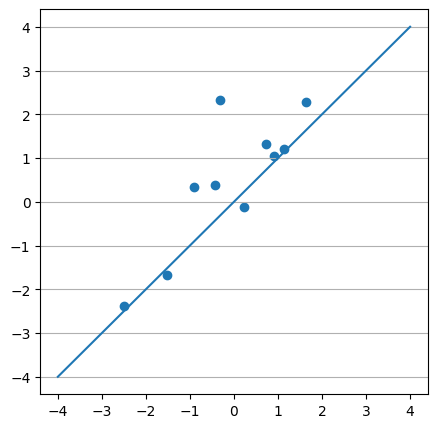

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=False)
axes.grid(axis="y", which="both");
axes.plot(x_y_line, x_y_line, label = "$y=x$")

axes.scatter(x, y);

### add powers of `x` to the dataframe for polynomial regression

In [7]:
df = pd.DataFrame(columns=["y", "x"], data= np.column_stack((y, x)) )
for a in np.arange(2, 12):
    df["x" + str(a)] = x**a

df.head(2)

,y,x,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,2.319497,-0.311784,0.097209,-0.030308,0.009450,-0.002946,0.000919,-0.000286,0.000089,-0.000028,0.000009,-0.000003
1,1.330826,0.729004,0.531447,0.387427,0.282436,0.205897,0.150099,0.109423,0.079770,0.058153,0.042393,0.030905


In [8]:
df = sm.add_constant(df)
df.head(3)

,const,y,x,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,1.0,2.319497,-0.311784,0.097209,-0.030308,0.009450,-0.002946,0.000919,-0.000286,0.000089,-0.000028,8.680279e-06,-2.706369e-06
1,1.0,1.330826,0.729004,0.531447,0.387427,0.282436,0.205897,0.150099,0.109423,0.079770,0.058153,4.239344e-02,3.090498e-02
2,1.0,-0.118061,0.217821,0.047446,0.010335,0.002251,0.000490,0.000107,0.000023,0.000005,0.000001,2.404325e-07,5.237121e-08


In [9]:
# reorder columns!
a = list(df.columns)
a.remove("y")
df = df[['y'] + a]
df.head(3)

,y,const,x,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,2.319497,1.0,-0.311784,0.097209,-0.030308,0.009450,-0.002946,0.000919,-0.000286,0.000089,-0.000028,8.680279e-06,-2.706369e-06
1,1.330826,1.0,0.729004,0.531447,0.387427,0.282436,0.205897,0.150099,0.109423,0.079770,0.058153,4.239344e-02,3.090498e-02
2,-0.118061,1.0,0.217821,0.047446,0.010335,0.002251,0.000490,0.000107,0.000023,0.000005,0.000001,2.404325e-07,5.237121e-08


In [10]:
# Everything has been random. 
# so, no need to "shuffle"
train_df = df.loc[0:7].copy()
test_df =  df.loc[8:].copy()

In [11]:
X_train = train_df.iloc[:, 1:9]
Y_train = train_df.iloc[:, 0]
X_train.head(2)

,const,x,x2,x3,x4,x5,x6,x7
0,1.0,-0.311784,0.097209,-0.030308,0.009450,-0.002946,0.000919,-0.000286
1,1.0,0.729004,0.531447,0.387427,0.282436,0.205897,0.150099,0.109423


In [12]:
import warnings
warnings.filterwarnings('ignore') 

model = sm.OLS(Y_train, X_train);
model_result = model.fit();
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 12 Oct 2024   Prob (F-statistic):                nan
Time:                        21:31:14   Log-Likelihood:                 219.49
No. Observations:                   8   AIC:                            -423.0
Df Residuals:                       0   BIC:                            -422.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3480        inf          0        nan         nan         nan
x             -4.6932        inf         -0        nan         nan         nan
x2            10.1656        inf          0        nan         nan         nan
x3            11.3308        inf          0        nan         nan         nan
x4           -17.7154        inf         -0        nan         nan         nan
x5            -8.5441        inf         -0        nan         nan         nan
x6             7.0447        inf          0        nan         nan         nan
x7             2.8976        inf          0        nan         nan         nan
==============================================================================
Omnibus:                       15.910   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.968
Skew:                          -1.791   Prob(JB):                       0.0506
Kurtosis:                       5.252   Cond. No.                     1.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
X_test = test_df.iloc[:, 1:9]
Y_test = test_df.iloc[:, 0]

In [14]:
#### polynomial creation to show fitted model
x = np.linspace(start = np.floor(df["x"].min()), stop = np.ceil(df["x"].max()), num=100)
poly_df = pd.DataFrame(columns=["x"], data=x)
for a in np.arange(2, 12):
    poly_df["x" + str(a)] = x**a

poly_df = sm.add_constant(poly_df)
poly_df["y_pred"] = model_result.predict(poly_df[list(X_train.columns)])

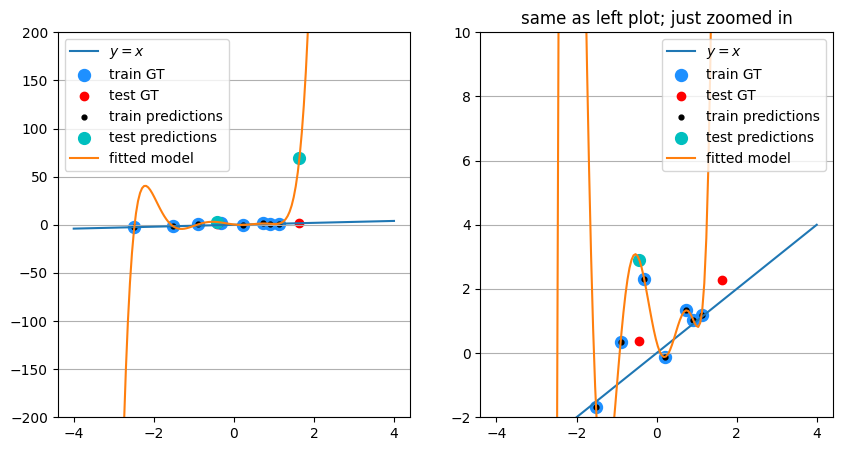

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
(ax1, ax2) = axes
ax1.grid(axis="y", which="both")
ax2.grid(axis="y", which="both")

ax1.plot(x_y_line, x_y_line, label = "$y=x$")

ax1.scatter(train_df["x"], train_df["y"], color="dodgerblue", label = "train GT", s=74);
ax1.scatter(test_df["x"],  test_df["y"], color="red", label = "test GT");


ax1.scatter(train_df["x"], model_result.predict(X_train), s = 12, color="k", label="train predictions")
ax1.scatter(test_df["x"], model_result.predict(X_test), s = 72, color="c", label="test predictions")
ax1.plot(poly_df["x"], poly_df["y_pred"], label="fitted model");
ax1.legend(loc="best");
ax1.set_ylim(-200, 200);
###################################

ax2.plot(x_y_line, x_y_line, label = "$y=x$")

ax2.scatter(train_df["x"], train_df["y"], color="dodgerblue", label = "train GT", s=74);
ax2.scatter(test_df["x"],  test_df["y"], color="red", label = "test GT");


ax2.scatter(train_df["x"], model_result.predict(X_train), s = 12, color="k", label="train predictions")
ax2.scatter(test_df["x"], model_result.predict(X_test), s = 72, color="c", label="test predictions")
ax2.plot(poly_df["x"], poly_df["y_pred"], label="fitted model");
ax2.title.set_text('same as left plot; just zoomed in')

ax2.legend(loc="best");
ax2.set_ylim(-2, 10);

In [16]:
from scipy.linalg import norm

train_error = norm(model_result.predict(X_train) - Y_train)
print (f"{train_error = }")
print ()


test_error = norm(model_result.predict(X_test) - Y_test)
print (f"{test_error = }")

train_error = 8.312761748826612e-13

test_error = 67.47322341713785
